In [1]:
# Import necessary libraries
import pandas as pd

# Load the original CSV file
original_data = pd.read_csv('/kaggle/input/food-crisis/predicting_food_crises_data.csv')  # Replace with your file path

# Filter the DataFrame to include only Uganda data
uganda_data = original_data[original_data['country'] == 'Uganda']  # Updated column name

# Save the filtered data to a new CSV file
uganda_data.to_csv('uganda_data.csv', index=False)  # Replace 'uganda_data.csv' with your desired file name
print("Done creating the file")

Done creating the file


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from the CSV file
data = pd.read_csv('/kaggle/working/uganda_data.csv')  # Replace with your dataset file path

# Define the features (X) and the target variable (y)
# Replace these with the actual column names from your dataset
features = ['year', 'month', 'ndvi_mean', 'rain_mean', 'et_mean', 'acled_count', 'p_staple_food', 'area', 'cropland_pct', 'pop', 'ruggedness_mean', 'pasture_pct']
target_variable = 'fews_ipc'  # Replace with the name of your target variable

X = data[features]

# Handle missing values in the target variable
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(data[target_variable].values.reshape(-1, 1))

# Split the data into a training set and a testing set (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.02982165218375476
R-squared: 0.0824447532089928


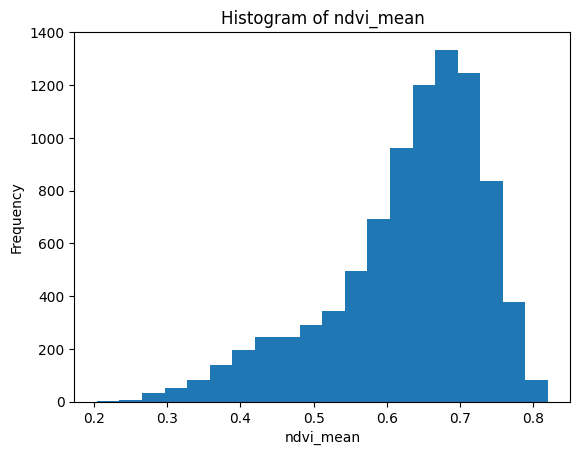

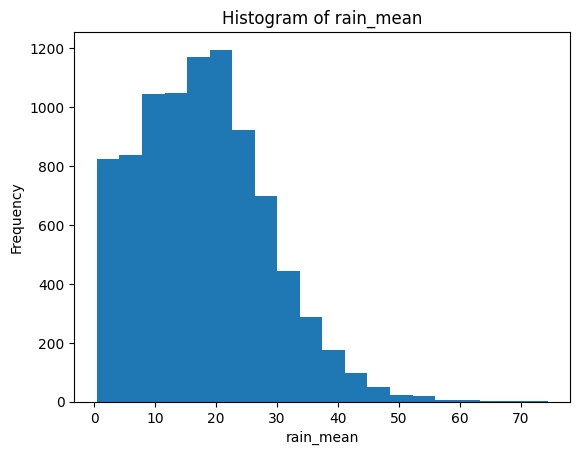

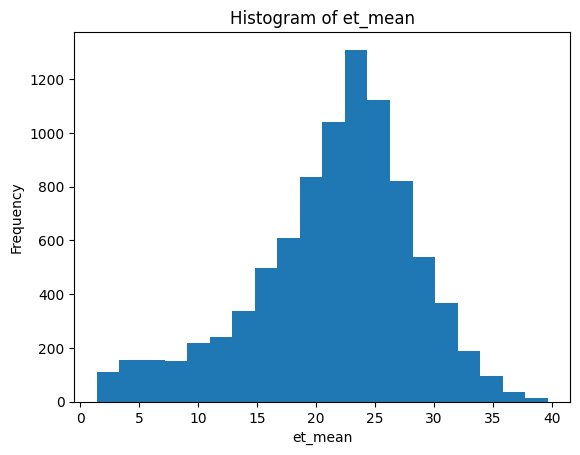

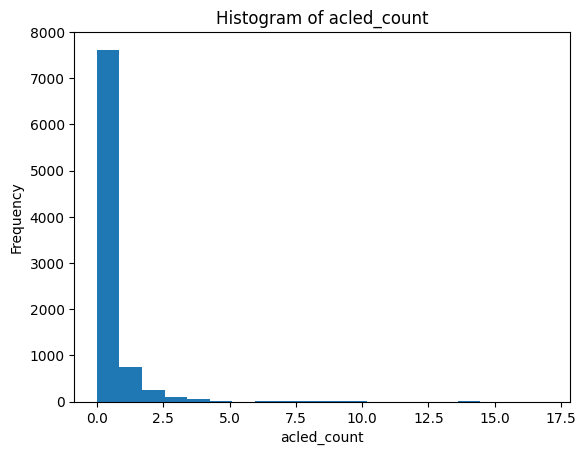

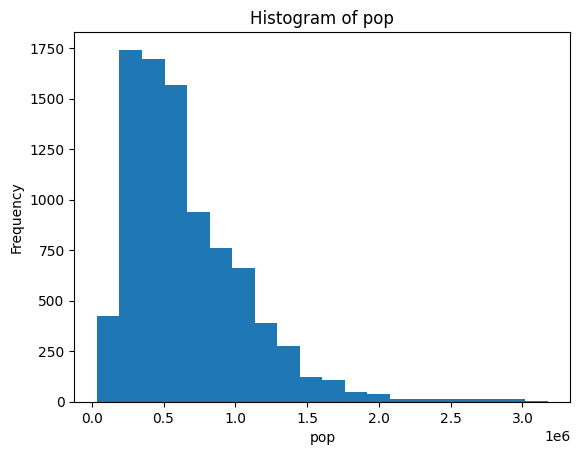

In [3]:
import matplotlib.pyplot as plt

# Plot histograms for selected columns
numeric_columns = ['ndvi_mean', 'rain_mean', 'et_mean', 'acled_count', 'pop']
for column in numeric_columns:
    plt.hist(data[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


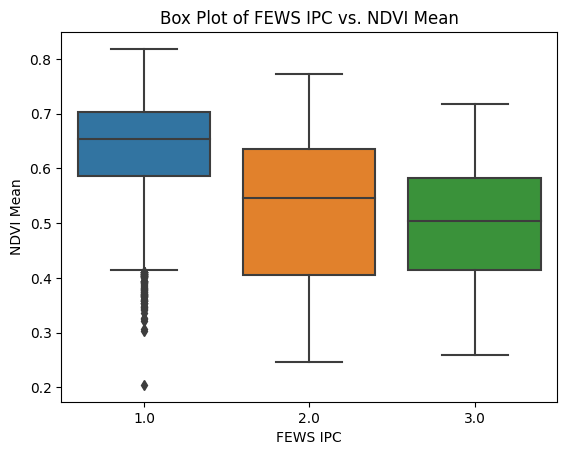

In [4]:
import seaborn as sns

# Create box plots for selected columns
sns.boxplot(x='fews_ipc', y='ndvi_mean', data=data)
plt.xlabel('FEWS IPC')
plt.ylabel('NDVI Mean')
plt.title('Box Plot of FEWS IPC vs. NDVI Mean')
plt.show()


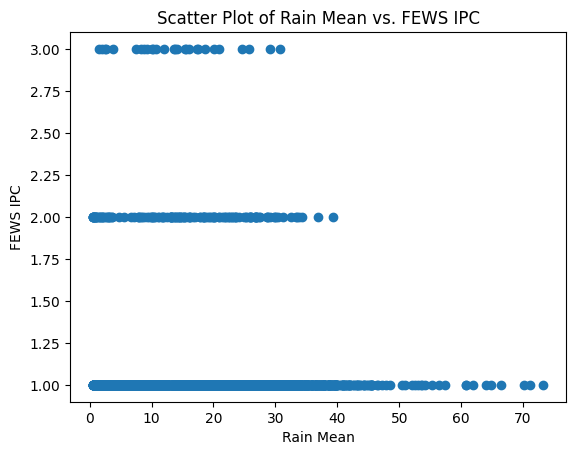

In [5]:
# Create a scatter plot for two numeric variables
plt.scatter(data['rain_mean'], data['fews_ipc'])
plt.xlabel('Rain Mean')
plt.ylabel('FEWS IPC')
plt.title('Scatter Plot of Rain Mean vs. FEWS IPC')
plt.show()


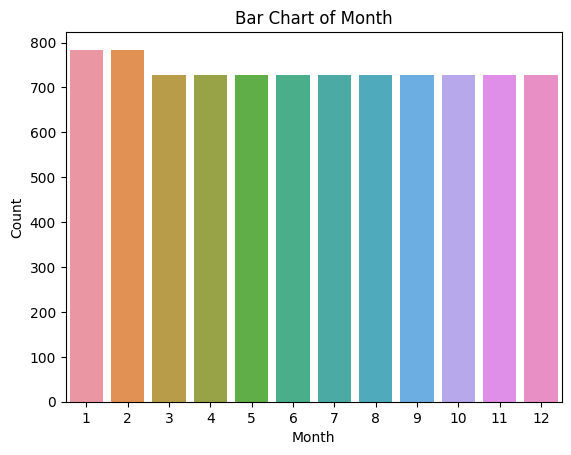

In [6]:
# Create a bar chart for a categorical variable
sns.countplot(x='month', data=data)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Bar Chart of Month')
plt.show()


<Axes: >

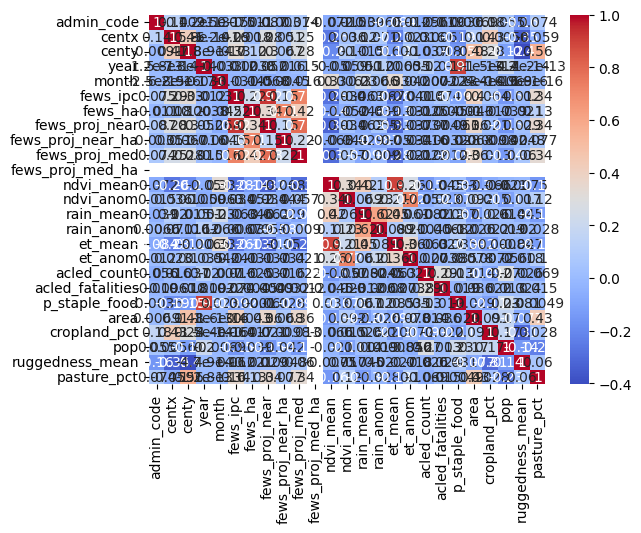

In [7]:
# Import the NumPy library
import numpy as np

# Select numeric columns (excluding non-numeric columns)
numeric_data = data.select_dtypes(include=[np.number])

# Create a correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


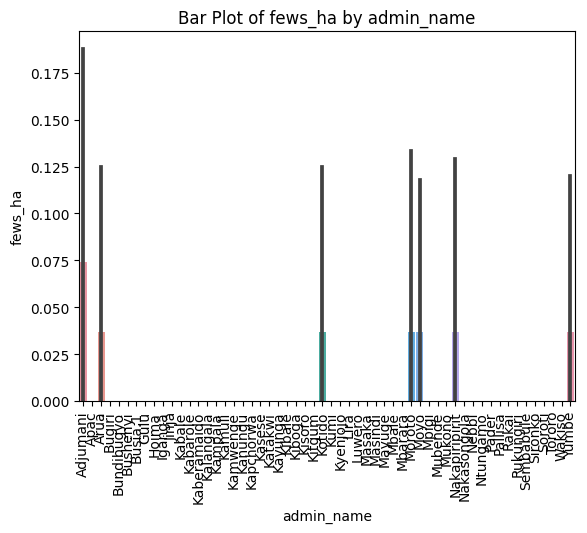

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for a specific numeric column (e.g., 'fews_ha') based on 'admin_name'
sns.barplot(x='admin_name', y='fews_ha', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('admin_name')
plt.ylabel('fews_ha')
plt.title('Bar Plot of fews_ha by admin_name')
plt.show()
